In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np



In [2]:
# Load the dataset
file_path = 'data/Nat_Gas.csv'  
data = pd.read_csv(file_path)

# Convert Dates column to datetime format and sort the data by date
data['Dates'] = pd.to_datetime(data['Dates'], format='%m/%d/%y')
data.sort_values(by='Dates', inplace=True)



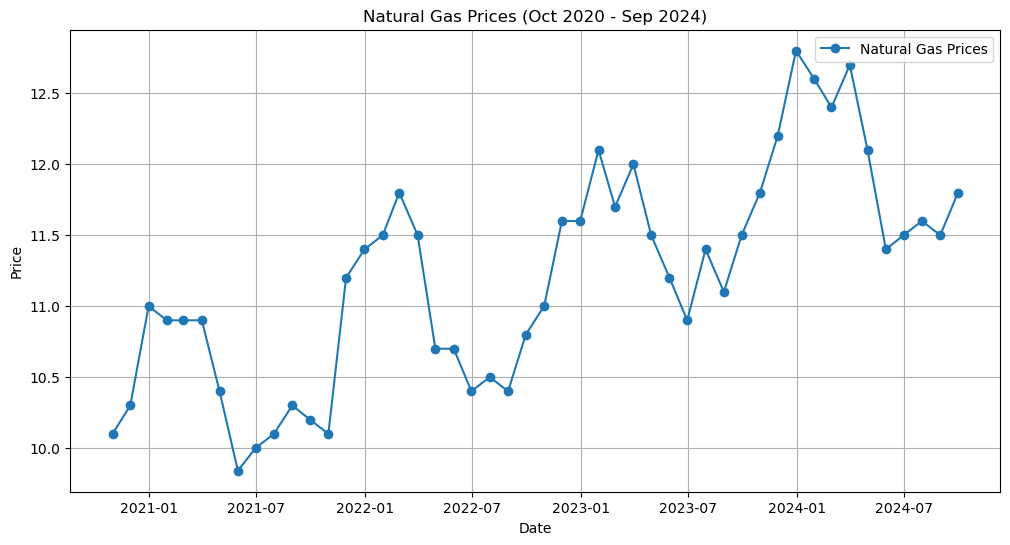

In [3]:
# Visualize the historical data
plt.figure(figsize=(12, 6))
plt.plot(data['Dates'], data['Prices'], marker='o', linestyle='-', label='Natural Gas Prices')
plt.title('Natural Gas Prices (Oct 2020 - Sep 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()



In [4]:
# Prepare data for modeling
data['Ordinal_Date'] = data['Dates'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal for numerical processing
X = data[['Ordinal_Date']].values
y = data['Prices'].values



In [5]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Function to estimate price for a given date
def estimate_price(input_date):
    ordinal_date = pd.Timestamp(input_date).toordinal()
    estimated_price = model.predict([[ordinal_date]])
    return estimated_price[0]

# Generate future dates for extrapolation (one year into the future)
future_dates = pd.date_range(data['Dates'].iloc[-1] + pd.Timedelta(days=1), periods=12, freq='M')
future_ordinal_dates = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_prices = model.predict(future_ordinal_dates)

# Combine future dates and predicted prices into a DataFrame
future_data = pd.DataFrame({'Dates': future_dates, 'Estimated Prices': future_prices})



C:\Users\pavan\AppData\Local\Temp\ipykernel_34548\2246192346.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(data['Dates'].iloc[-1] + pd.Timedelta(days=1), periods=12, freq='M')


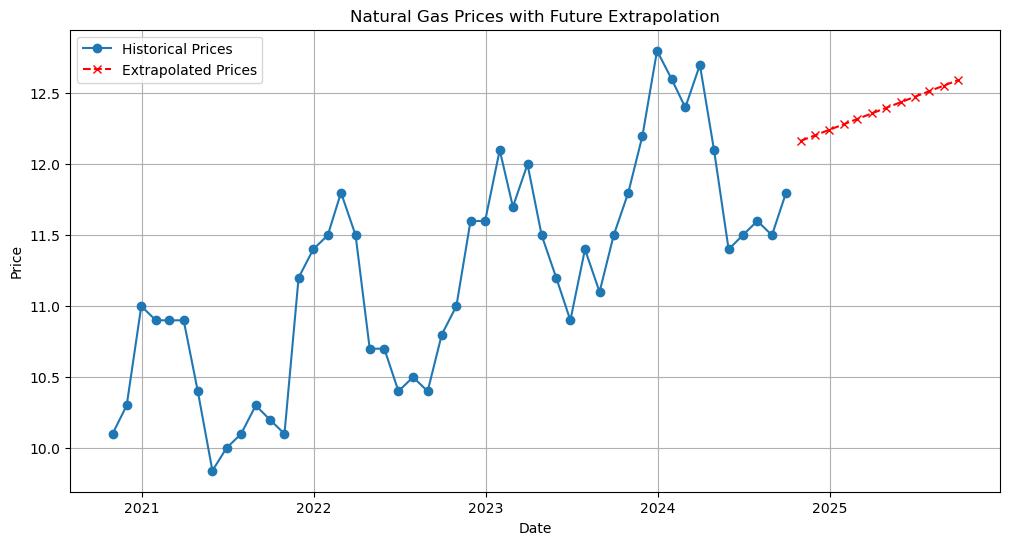

In [6]:
# Visualize the historical data and future extrapolation
plt.figure(figsize=(12, 6))
plt.plot(data['Dates'], data['Prices'], marker='o', label='Historical Prices')
plt.plot(future_data['Dates'], future_data['Estimated Prices'], marker='x', linestyle='--', color='red', label='Extrapolated Prices')
plt.title('Natural Gas Prices with Future Extrapolation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()




In [7]:
# Display extrapolated prices
print(future_data)



        Dates  Estimated Prices
0  2024-10-31         12.164589
1  2024-11-30         12.203060
2  2024-12-31         12.242814
3  2025-01-31         12.282567
4  2025-02-28         12.318474
5  2025-03-31         12.358227
6  2025-04-30         12.396699
7  2025-05-31         12.436452
8  2025-06-30         12.474923
9  2025-07-31         12.514677
10 2025-08-31         12.554431
11 2025-09-30         12.592902


In [8]:
# Example usage of the estimate_price function
example_date = '2025-06-15'  
print(f"Estimated price on {example_date}: {estimate_price(example_date)}")

Estimated price on 2025-06-15: 12.45568776065943


In [9]:
# Define the contract pricing function
def calculate_contract_value(
    injection_dates, 
    withdrawal_dates, 
    prices, 
    injection_rate, 
    withdrawal_rate, 
    max_storage_volume, 
    storage_cost_per_unit
):
    """
    Calculate the value of a gas storage contract.

    Parameters:
    - injection_dates (list of str): Dates when gas is injected (YYYY-MM-DD).
    - withdrawal_dates (list of str): Dates when gas is withdrawn (YYYY-MM-DD).
    - prices (dict): A dictionary mapping dates (YYYY-MM-DD) to natural gas prices.
    - injection_rate (float): Rate of gas injection per day (units/day).
    - withdrawal_rate (float): Rate of gas withdrawal per day (units/day).
    - max_storage_volume (float): Maximum storage capacity (units).
    - storage_cost_per_unit (float): Cost of storing one unit of gas.

    Returns:
    - float: The net value of the contract.
    """
    # Convert injection and withdrawal dates to sorted lists
    injection_dates = sorted([pd.Timestamp(date) for date in injection_dates])
    withdrawal_dates = sorted([pd.Timestamp(date) for date in withdrawal_dates])

    # Initialize variables
    storage_volume = 0
    net_value = 0

    # Process injections
    for date in injection_dates:
        date_str = date.strftime('%Y-%m-%d')
        if date_str in prices:
            injected_volume = min(injection_rate, max_storage_volume - storage_volume)
            storage_volume += injected_volume
            net_value -= injected_volume * prices[date_str]  # Cost of injection

    # Process withdrawals
    for date in withdrawal_dates:
        date_str = date.strftime('%Y-%m-%d')
        if date_str in prices:
            withdrawn_volume = min(withdrawal_rate, storage_volume)
            storage_volume -= withdrawn_volume
            net_value += withdrawn_volume * prices[date_str]  # Revenue from withdrawal

    # Subtract storage costs
    net_value -= storage_volume * storage_cost_per_unit

    return net_value



In [10]:
# Test the function with sample inputs
prices_sample = {
    '2024-10-31': 12.16,
    '2024-11-30': 12.20,
    '2024-12-31': 12.24,
    '2025-01-31': 12.28,
    '2025-02-28': 12.32
}

sample_injection_dates = ['2024-10-31', '2024-11-30']
sample_withdrawal_dates = ['2024-12-31', '2025-01-31']
injection_rate = 100  # units/day
withdrawal_rate = 50  # units/day
max_storage_volume = 200  # units
storage_cost_per_unit = 0.5  # cost per unit

# Calculate contract value
contract_value = calculate_contract_value(
    sample_injection_dates, 
    sample_withdrawal_dates, 
    prices_sample, 
    injection_rate, 
    withdrawal_rate, 
    max_storage_volume, 
    storage_cost_per_unit
)

print(f"The contract value is: {contract_value}")

The contract value is: -1260.0
